<a href="https://colab.research.google.com/github/setitfree/Everything/blob/main/Every_Lec2_Plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
!wget https://raw.githubusercontent.com/setitfree/NumericalPython/main/data/combined_population_votes.csv

In [8]:
combined = pd.read_csv("combined_population_votes.csv")
combined = combined.set_index('State')  # Set index "state"
combined.head()
## OR
#combined = pd.read_csv("combined_population_votes.csv", index_col= 'State')

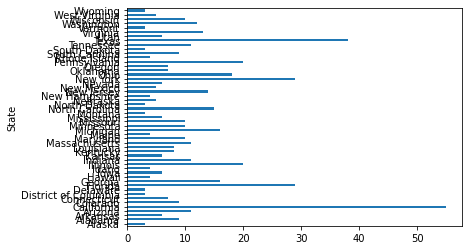

In [11]:
combined['Votes'].plot(kind = 'barh') ## Should use this though
# OR
#combined.Votes.plot(kind = 'barh')

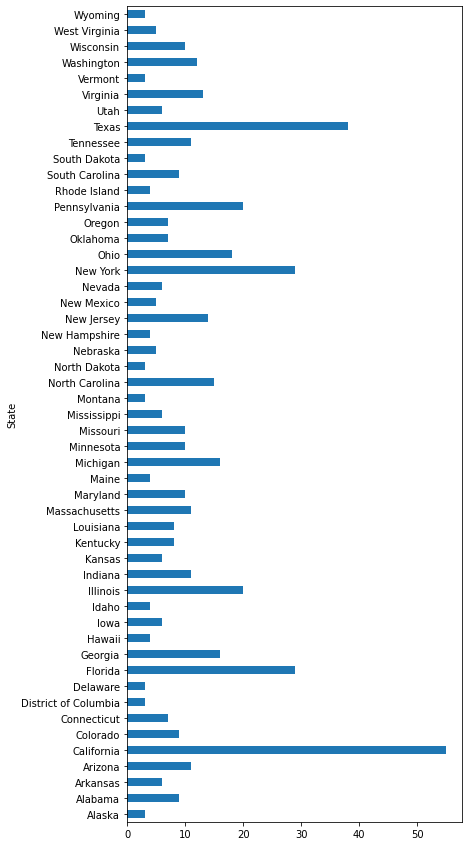

In [28]:
plt.figure(figsize=(6,15))   ## With this we expand the graph. '6' is for how wide graph should be and '15'how long
combined['Votes'].plot(kind='barh')


In [ ]:
## Another way of doing above cell and also sorting it for better interpretation.
combined['Votes'].sort_values(ascending = True).plot(kind='barh')

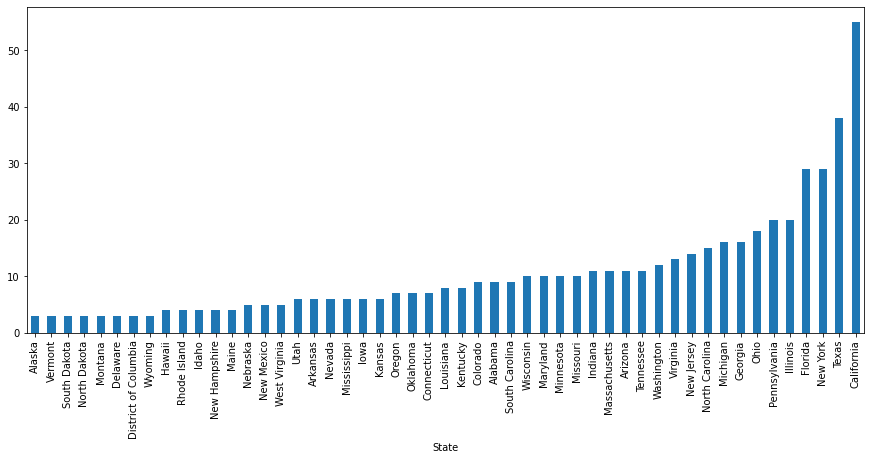

In [37]:
## Another way of sorting
fig = plt.figure(figsize=(15,6)) ## I changed size
axes = fig.gca()    ## gets the axes of graph
combined['Votes'].sort_values(ascending = True).plot(ax=axes, kind='bar')   # I removed "h" to get vertical grapg. "h" denotes horizontal

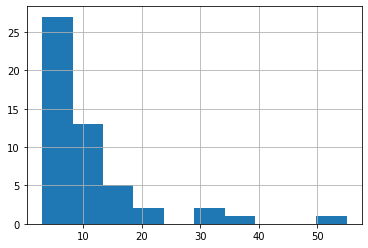

In [40]:
## To create histogram instead of bar graph
combined['Votes'].hist()
# OR 
#combined.Votes.hist()

In [ ]:
## Dosent make sence though. It just expanded it
plt.figure(figsize=(6,15))
combined['Votes'].hist()